# Playstore-analysis 

## Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing csv file and  Some basic information

In [5]:
df = pd.read_csv(r'C:\Users\vaishu\Downloads\playstore-analysis - playstore-analysis.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df.shape

(10841, 13)

In [7]:
df.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null float64
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [12]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## 1. Data clean up – Missing value treatment

## a. Drop records where rating is missing since rating is our target/study variable

## Replacing the NaN values with the mean of ratings

In [13]:
df['Rating'] = df['Rating'].replace(np.NaN,df.Rating.mean())

In [14]:
df.Rating.isnull().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            10841 non-null float64
Reviews           10841 non-null object
Size              10841 non-null float64
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [16]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

## b. Check the null values for the Android Ver column.

In [17]:
df['Android Ver'].isnull().sum()

3

## i. Are all 3 records having the same problem?

In [20]:
df.columns = df.columns.str.replace('Android Ver','Android_Ver')
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android_Ver'],
      dtype='object')

In [25]:
df.loc[df['Android_Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android_Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.00000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.00000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.52952,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


##  All the three records are having NaN as their missing values.Yes all three records are not having the same problem,third record is missing the Category and also contain NaN..

## ii. Drop the 3 rd record i.e. record for “Life Made WIFI …” 

In [26]:
df.drop([10472],inplace=True)

In [27]:
df[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android_Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4000.0,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404.0,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4100.0,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14000.0,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2600.0,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


In [28]:
df.shape

(10840, 13)

## Thus its dropped

## iii. Replace remaining missing values with the mode

In [29]:
df['Android_Ver'].fillna((df['Android_Ver'].mode().values[0]),inplace=True)

In [30]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android_Ver       0
dtype: int64

## c. Current ver – replace with most common value

In [31]:
df['Current Ver'].fillna((df['Current Ver'].mode().values[0]),inplace=True)

In [32]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android_Ver       0
dtype: int64

In [33]:
df['Type'].fillna((df['Type'].mode().values[0]),inplace=True)

In [43]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android_Ver       0
dtype: int64

## 2. Data clean up – correcting the data types

## a. Which all variables need to be brought to numeric types?

## Price,reviews and Installs  need to be converted to numerical data types

## b. Price variable – remove $ sign and convert to float

In [44]:
df['Price'] = df['Price'].apply(lambda x:str(x).replace('$','') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x:float(x))

## c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [45]:
df['Installs'] = df['Installs'].apply(lambda x:str(x).replace(',', '') if ',' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x:str(x).replace('+', '') if '+' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x:int(x))

## d. Convert all other identified columns to numeric

## Reviews dosen't have any anamolies or special characters

In [46]:
df['Reviews'] = pd.to_numeric(df['Reviews'],errors='coerce')

In [47]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [48]:
df.describe()  ## Numerical summary 

,Rating,Reviews,Size,Installs,Price
count,10840.000000,1.084000e+04,10840.000000,1.084000e+04,10840.000000
mean,4.191972,4.441529e+05,21516.529524,1.546434e+07,1.027368
std,0.478907,2.927761e+06,20747.494577,8.502936e+07,15.949703
min,1.000000,0.000000e+00,8.500000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,5900.000000,1.000000e+03,0.000000
50%,4.200000,2.094000e+03,18000.000000,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,26000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


## 3. Sanity checks – check for the following and handle accordingly

## a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.
## i. Are there any such records? Drop if so.

In [49]:
rating=[]
for rating in df.Rating:
    print(rating)

4.1
3.9
4.7
4.5
4.3
4.4
3.8
4.1
4.4
4.7
4.4
4.4
4.2
4.6
4.4
3.2
4.7
4.5
4.3
4.6
4.0
4.1
4.7
4.193338315362448
4.7
4.8
4.7
4.1
3.9
4.1
4.2
4.1
4.5
4.2
4.7
3.8
4.7
4.1
4.7
4.0
4.2
4.5
4.4
3.8
4.2
4.7
4.6
4.2
4.3
4.2
4.0
3.8
4.6
3.9
4.3
4.9
4.4
4.2
4.0
3.9
4.6
4.9
4.3
4.6
4.9
3.9
4.0
4.3
3.9
4.2
4.8
3.6
4.2
4.8
4.8
4.6
4.5
4.3
4.5
4.9
3.9
4.4
4.0
4.3
3.7
4.4
4.3
3.2
4.6
4.6
4.5
3.7
4.6
4.6
4.6
4.0
4.4
4.0
4.7
4.9
4.7
3.9
3.9
4.2
4.6
4.3
4.7
4.7
4.8
4.2
4.3
4.5
4.1
4.193338315362448
4.2
4.5
4.4
4.0
4.1
4.1
4.4
4.6
4.5
4.193338315362448
3.9
4.4
4.193338315362448
4.6
3.8
4.193338315362448
4.193338315362448
4.0
4.3
4.5
4.193338315362448
4.1
3.7
4.7
4.2
4.6
4.5
4.6
4.4
4.2
4.5
4.5
4.5
4.5
4.4
4.5
4.6
4.8
3.9
4.6
4.2
4.1
4.7
4.2
4.3
3.3
4.6
4.8
4.7
4.193338315362448
4.1
4.6
4.1
4.6
4.7
4.5
3.9
4.4
4.3
4.2
4.5
4.4
3.4
4.9
4.6
4.4
4.193338315362448
4.4
4.4
4.4
3.5
4.193338315362448
4.4
4.1
4.3
4.4
4.3
4.3
4.1
4.4
4.3
3.9
4.8
4.5
4.4
4.0
4.3
4.0
4.2
4.5
4.2
4.2
4.6
4.1
4.6
3.1
3.9
4.3
4.1
4.4
4.1


3.4
4.4
4.3
4.6
4.4
4.3
4.6
4.2
4.2
4.5
4.4
4.2
4.5
4.8
4.4
4.6
4.5
4.3
4.6
4.4
4.4
4.5
4.6
4.6
4.6
4.1
4.5
4.6
4.4
4.7
4.6
4.3
4.5
4.6
4.2
4.5
4.8
4.1
4.3
4.4
4.0
4.2
4.0
4.2
4.5
4.7
4.2
4.4
4.6
4.9
4.4
4.5
4.6
4.2
4.5
4.6
4.6
4.5
4.4
4.6
4.5
4.6
4.4
4.4
4.3
4.3
4.6
4.3
4.3
4.6
4.5
4.5
4.2
4.7
4.3
4.0
4.4
4.3
4.6
4.7
4.4
4.7
4.4
4.3
4.2
4.4
4.5
4.5
4.5
4.4
4.3
4.5
4.7
4.7
4.6
4.6
4.4
4.4
4.7
4.6
4.5
4.3
4.3
4.3
4.6
4.8
4.5
4.4
4.5
4.5
4.6
4.6
4.6
4.6
4.7
4.5
4.5
4.5
4.6
4.5
4.4
4.4
4.6
4.7
4.5
4.4
4.6
4.7
4.6
4.5
4.4
4.5
4.3
4.5
4.2
4.5
4.3
4.4
4.7
4.6
4.7
4.6
4.4
4.6
4.5
4.3
4.5
4.5
4.6
4.6
4.3
4.6
4.5
4.7
4.5
4.7
4.7
4.6
4.4
4.3
4.5
4.3
4.4
4.2
4.3
4.5
4.4
4.7
4.2
4.1
4.5
4.5
4.5
4.1
4.3
4.5
4.4
4.5
4.6
4.0
4.3
4.5
4.4
4.4
4.6
4.2
4.5
4.6
4.5
4.7
4.5
4.5
4.5
4.4
4.6
4.3
4.4
4.3
4.7
4.7
4.4
4.3
4.4
4.5
4.5
4.4
4.4
4.6
4.6
4.4
4.6
4.2
4.4
4.6
4.6
4.7
4.5
4.2
4.6
4.7
4.6
4.3
4.6
4.4
4.4
4.5
4.2
4.4
4.3
4.7
4.5
4.4
4.5
4.4
4.4
4.5
4.6
4.5
4.3
4.7
4.4
4.5
4.2
4.5
4.5
4.7
4.4
4.3
4.6
3.9


3.4
3.8
4.4
4.7
4.6
4.1
3.8
4.4
4.4
3.9
4.1
4.5
3.7
4.4
4.5
4.5
3.8
3.1
4.5
5.0
4.4
4.193338315362448
4.3
2.9
3.1
3.3
4.1
4.6
4.4
4.5
4.3
4.3
4.5
4.5
2.2
4.5
4.2
4.5
4.6
3.9
4.1
3.3
4.5
4.1
4.8
4.1
4.5
4.193338315362448
4.6
4.6
4.3
4.1
4.5
4.3
4.4
4.7
4.4
4.4
4.3
4.2
4.2
4.6
4.5
4.6
4.7
4.8
4.7
4.7
1.7
4.5
4.0
3.6
2.0
4.7
4.1
4.3
4.3
4.5
4.4
4.4
4.6
3.7
4.5
4.0
4.8
4.0
4.7
4.8
4.6
4.3
4.2
4.8
4.2
4.6
4.2
4.5
4.6
4.5
4.5
4.3
4.8
4.6
4.5
4.3
4.2
4.4
4.5
4.2
4.6
4.6
4.4
4.5
4.5
4.6
4.5
4.4
4.1
4.4
4.6
4.6
4.5
4.5
4.3
4.3
3.3
3.7
4.5
4.4
3.1
4.0
4.4
4.2
3.9
4.4
4.6
4.8
4.4
3.9
4.5
3.6
3.4
4.7
4.4
4.4
4.5
4.2
4.6
4.3
4.3
4.3
4.6
4.4
4.5
4.5
4.0
4.3
4.5
4.1
4.3
4.0
4.3
4.6
4.2
4.4
4.5
4.3
4.0
4.3
4.4
4.6
4.4
4.3
4.2
4.3
4.3
4.6
3.6
4.3
4.2
4.2
4.4
4.3
4.9
4.5
4.2
4.3
4.2
3.8
4.2
1.0
4.4
4.0
4.193338315362448
4.4
4.4
4.5
4.193338315362448
3.4
3.8
4.193338315362448
3.7
4.193338315362448
4.1
4.6
4.4
4.2
4.2
4.4
4.5
4.2
4.5
4.3
4.4
4.2
3.6
4.0
4.4
4.6
4.5
4.4
4.2
4.3
4.6
1.8
3.8
4.4
3.0
3.4
4.6


4.3
5.0
4.3
4.193338315362448
4.7
4.0
3.8
5.0
4.8
4.5
4.3
4.193338315362448
4.193338315362448
4.193338315362448
4.193338315362448
3.7
4.193338315362448
4.193338315362448
4.193338315362448
4.193338315362448
4.193338315362448
4.3
4.193338315362448
3.8
4.193338315362448
4.193338315362448
4.5
4.6
4.1
4.2
4.193338315362448
5.0
4.193338315362448
4.193338315362448
4.193338315362448
4.3
4.193338315362448
3.3
3.6
4.0
4.0
4.0
4.3
4.2
4.3
4.2
4.5
4.3
4.6
4.4
4.2
4.2
4.2
3.4
3.2
4.0
4.6
3.2
4.4
4.0
4.7
4.193338315362448
3.7
3.9
4.2
4.1
3.5
4.8
4.3
3.9
4.193338315362448
3.5
4.3
4.4
4.8
3.9
3.8
4.2
4.0
4.0
4.4
4.7
4.5
4.3
3.3
4.3
4.1
2.1
3.7
4.2
4.4
4.2
2.1
2.4
4.1
3.1
5.0
4.193338315362448
3.5
4.2
4.193338315362448
4.7
4.193338315362448
4.193338315362448
4.193338315362448
4.8
4.193338315362448
4.5
4.6
4.6
4.9
4.8
4.0
3.9
4.1
4.1
4.5
4.2
4.0
4.4
1.9
4.193338315362448
4.193338315362448
3.7
4.193338315362448
4.2
4.0
4.3
2.5
4.4
4.193338315362448
3.7
4.7
4.6
4.4
4.3
4.4
2.6
3.6
3.8
4.4
4.4
3.0
4.2
3.7


4.0
4.6
4.7
4.193338315362448
4.1
4.5
4.3
4.193338315362448
5.0
5.0
4.2
4.0
4.193338315362448
5.0
2.7
4.1
4.193338315362448
4.193338315362448
4.4
4.193338315362448
4.3
4.1
4.7
4.4
4.193338315362448
4.193338315362448
3.6
4.0
4.1
4.0
4.1
4.0
4.6
4.193338315362448
4.193338315362448
4.193338315362448
4.193338315362448
5.0
3.6
4.1
4.3
4.1
2.6
2.7
3.8
5.0
4.2
4.193338315362448
5.0
2.6
4.4
4.3
4.193338315362448
4.193338315362448
4.7
2.8
4.1
4.193338315362448
3.6
4.193338315362448
4.193338315362448
4.0
4.193338315362448
4.193338315362448
5.0
5.0
4.7
4.7
4.6
4.7
4.6
4.6
4.6
4.6
4.6
4.4
3.8
4.1
3.4
4.5
4.5
4.5
4.0
4.7
4.4
4.4
4.7
4.7
4.2
4.2
4.0
3.6
4.7
4.4
4.3
4.4
4.4
4.4
4.3
3.3
3.6
4.5
4.5
4.6
4.3
3.6
4.3
4.4
4.1
4.2
4.8
4.2
4.193338315362448
4.0
3.7
4.5
4.1
4.6
4.5
4.7
4.3
4.3
4.6
4.1
4.2
4.3
4.2
4.3
3.6
4.2
4.2
4.0
4.6
4.3
4.4
4.5
4.3
3.7
4.2
4.7
4.6
4.5
4.1
4.5
4.3
3.4
4.2
3.9
4.4
4.1
4.3
3.9
4.0
4.193338315362448
5.0
4.2
4.3
4.5
4.5
3.9
4.193338315362448
4.5
3.5
3.6
1.9
4.3
3.2
1.6
4.2
4.

4.193338315362448
4.193338315362448
3.8
3.9
4.6
1.8
4.193338315362448
4.3
3.9
4.193338315362448
4.8
3.7
4.0
4.1
4.6
4.0
4.193338315362448
4.8
4.193338315362448
4.0
3.5
4.193338315362448
3.0
4.6
1.6
3.8
1.7
4.6
5.0
4.6
4.4
4.5
3.8
4.0
4.1
4.193338315362448
5.0
4.193338315362448
4.193338315362448
4.193338315362448
4.193338315362448
5.0
1.0
4.193338315362448
4.193338315362448
4.4
4.7
4.6
2.4
4.193338315362448
4.5
4.193338315362448
4.193338315362448
4.4
4.3
5.0
4.1
3.8
3.9
3.1
4.7
4.5
3.5
4.5
4.6
4.5
4.5
4.4
4.3
4.4
4.2
4.6
4.5
3.8
4.3
4.6
4.3
3.6
4.2
4.7
4.3
4.7
4.8
3.1
4.5
4.4
4.5
4.5
4.193338315362448
4.7
4.1
4.4
4.3
4.6
3.4
4.193338315362448
4.7
3.6
3.7
2.1
2.0
3.5
4.3
2.4
4.5
2.8
4.193338315362448
4.5
4.193338315362448
2.8
3.9
3.2
3.1
2.4
4.6
2.9
4.0
3.7
2.3
2.9
4.6
4.3
5.0
4.2
4.6
4.5
4.2
4.8
3.5
4.6
3.5
3.6
4.193338315362448
5.0
3.0
4.193338315362448
4.193338315362448
2.9
3.7
4.6
4.193338315362448
4.2
3.2
2.5
4.4
4.3
2.7
4.0
4.5
3.4
4.3
4.3
4.193338315362448
4.3
4.193338315362448
4.

4.3
4.193338315362448
4.193338315362448
4.193338315362448
4.4
4.193338315362448
4.0
4.5
4.6
4.3
4.1
4.4
3.5
4.1
3.8
4.2
4.3
4.5
4.0
4.0
4.3
4.1
3.4
4.0
4.3
4.7
4.5
4.3
4.1
4.1
4.4
4.6
4.193338315362448
3.8
3.9
4.2
4.2
3.7
4.3
4.2
3.6
4.3
4.3
4.3
4.5
4.3
4.7
3.8
4.0
4.1
4.193338315362448
3.9
4.3
3.4
4.193338315362448
4.2
4.5
4.4
4.2
4.7
4.6
4.4
4.4
4.8
4.6
4.3
4.4
4.4
3.3
4.5
4.6
4.3
4.9
4.3
4.193338315362448
4.5
4.9
3.7
4.5
4.6
4.5
4.1
4.8
4.193338315362448
5.0
3.4
4.5
4.8
4.5
4.5
4.5
4.5
4.5
4.1
4.1
3.6
4.7
4.6
4.9
4.6
4.1
4.5
3.9
3.9
4.6
3.8
4.7
3.9
4.1
3.9
4.0
4.3
4.0
4.4
4.1
5.0
4.8
4.193338315362448
4.6
5.0
4.2
4.7
4.0
4.4
4.9
3.5
4.1
4.2
4.4
4.193338315362448
4.5
3.1
4.193338315362448
4.5
4.6
4.3
4.4
4.6
4.3
4.8
2.8
4.1
1.0
3.0
5.0
4.5
4.193338315362448
4.193338315362448
4.193338315362448
4.193338315362448
4.193338315362448
4.193338315362448
4.193338315362448
5.0
4.1
4.193338315362448
4.193338315362448
4.193338315362448
4.4
3.0
4.193338315362448
3.8
4.193338315362448
3.9
4.193338

In [52]:
df.Rating.mean()

4.191972387162603

In [53]:
df[df.Rating<1]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android_Ver


In [62]:
df[df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android_Ver


## b.	Reviews should not be more than installs as only those who installed can review the app.
## i.	Are there any such records? Drop if so


In [63]:
df[df['Reviews']>df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android_Ver


In [64]:
df.drop(df[df['Reviews']>df['Installs']].index, inplace = True)

In [65]:
df.shape

(10829, 13)

## 4. Identify and handle outliers –

## a.	Price column

## i.	Make suitable plot to identify outliers in price

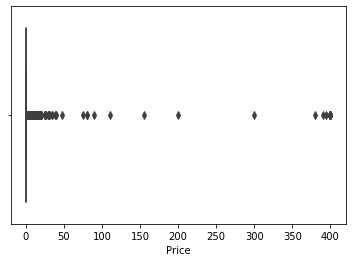

In [66]:
sns.boxplot(df['Price'])
plt.show()

## Price attribute has outliers

## ii.	Do you expect apps on the play store to cost $200?## Check out these cases

In [70]:
df.loc[df.Price == 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android_Ver
9719,EP Cook Book,MEDICAL,4.193338,0,3200.0,0,Paid,200.0,Everyone,Medical,"July 26, 2015",1,3.0 and up


## Yes, there is one app on the playstore which cost $200

## iii.	After dropping the useless records, make the suitable plot again to identify outliers## 

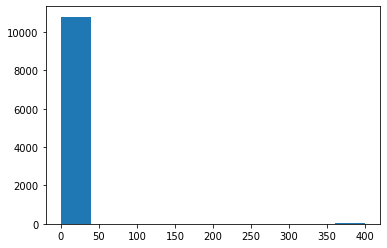

In [71]:
plt.hist(df.Price)
plt.show()

## iv.	Limit data to records with price < $30

In [75]:
df = df.loc[df.Price<30,:]
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19000.00000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14000.00000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8700.00000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25000.00000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2800.00000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.400000,167,5600.00000,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.800000,178,19000.00000,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.100000,36815,29000.00000,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.400000,13791,33000.00000,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.700000,121,3100.00000,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [76]:
df.shape

(10798, 13)

## b.	Reviews column

## i.	Make suitable plot

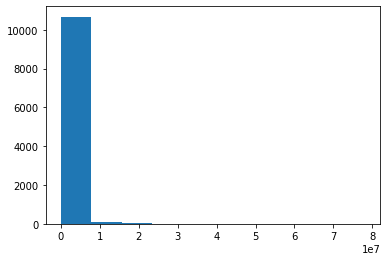

In [77]:
plt.hist(x=df['Reviews'])
plt.show()

## ii.	Limit data to apps with < 1 Million reviews

In [79]:
df = df.loc[df.Reviews<1000000,:]
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19000.00000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14000.00000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8700.00000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25000.00000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2800.00000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.400000,167,5600.00000,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.800000,178,19000.00000,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.100000,36815,29000.00000,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.400000,13791,33000.00000,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.700000,121,3100.00000,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [80]:
df.shape

(10094, 13)

## c.	Installs

## i.	What is the 95th percentile of the installs?

In [83]:
np.percentile(df['Installs'],95)

10000000.0

In [84]:
df.shape

(10094, 13)

## ii.	Drop records having a value more than the 95th percentile

In [85]:
df = df[df.Installs < np.percentile(df['Installs'],95)]
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19000.00000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14000.00000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8700.00000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2800.00000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.400000,167,5600.00000,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.800000,178,19000.00000,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.100000,36815,29000.00000,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.400000,13791,33000.00000,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.700000,121,3100.00000,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up
10,Text on Photo - Fonteee,ART_AND_DESIGN,4.400000,13880,28000.00000,1000000,Free,0.0,Everyone,Art & Design,"October 27, 2017",1.0.4,4.1 and up


In [86]:
df.shape

(8718, 13)

## Data analysis to answer business questions

## 5.	What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

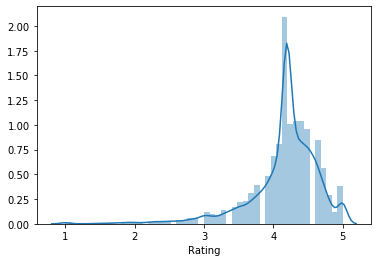

In [87]:
sns.distplot(df.Rating)
plt.show()

## Ratings are mostly between 4 and 5.It is most skewed towards higher values that means it has positive skewness 

# a.	How do you explain this?

## 1.The Ratings given by users are mostly between 4 and 5..
## 2.The distribution for rating is low at first and there is a sudden and large increase in the ratings near 4
## 3.Then again the ratings came down near 4.7 to 5.0
## 4.The average rating is also of 4.1 and ratings have the highest(or) extreme value in between 4 and 4.5
## 5.And it also skewed towards positive values . Positive mean with positive skewness is always good.

# b.	What is the implication of this on your analysis?

## 1. The Ratings of the apps on playstore have very good rating and we can find less cases where the rating is low with 1 or 2 .
## 2. Finally we can say that the overall ratings of apps is maximum.

## 6.	What are the top Content Rating values?

In [687]:
df['Content Rating'].value_counts()

Everyone           7193
Teen                870
Mature 17+          384
Everyone 10+        266
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

## The top 'Content Rating' values are 'Everyone' with 7193

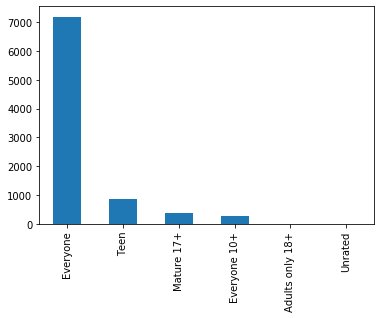

In [89]:
df['Content Rating'].value_counts().plot.bar()
plt.show()

## a.	Are there any values with very few records?

## Yes there are two records where we can find very few records : Adults only 18+ and Unrated with 3 and 2 records respectively which are useless in our analysis

## b.	If yes, drop those as they won’t help in the analysis

In [96]:
df.loc[df['Content Rating'] == 'Adults only 18+']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android_Ver


In [97]:
df.loc[df['Content Rating'] == 'Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android_Ver


In [98]:
df.drop(df.loc[df['Content Rating'] == 'Adults only 18+'].index,inplace=True)

In [99]:
df.shape

(8713, 13)

In [100]:
df.drop(df.loc[df['Content Rating'] == 'Unrated'].index,inplace=True)

In [101]:
df.shape

(8713, 13)

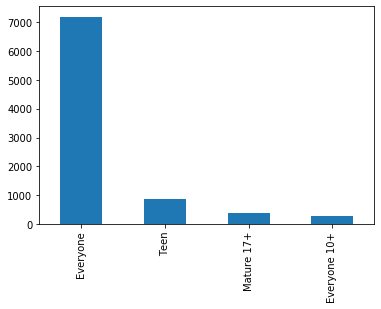

In [103]:
df['Content Rating'].value_counts().plot.bar()
plt.show()

## Thus the values with few records are dropped

## 7.	Effect of size on rating

## a.	Make a joinplot to understand the effect of size on rating

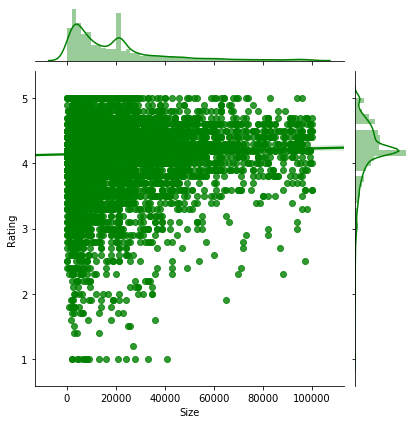

In [104]:
sns.jointplot(data=df,x='Size',y='Rating',color='green',kind='reg')
plt.show()

# b.	Do you see any patterns?

## Yes we can observe a pattern of regression line which is perfectly flat. The slope of the line is zero. 

# c.	How do you explain the pattern?

## The regression line is linear . As there is a regression line with zero slope, there is no linear  relationship between the variables taken .
## There is no positive or negative relationship between the variables.

## 8.	Effect of price on rating

## a.	Make a jointplot (with regression line)

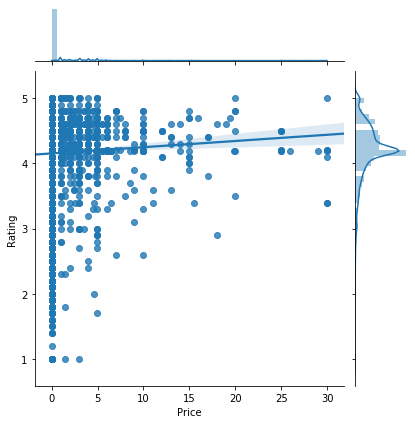

In [106]:
sns.jointplot(data=df,x='Price',y='Rating',kind='reg')
plt.show()

# b.	What pattern do you see?

## The regression line is linear, and the slope is not zero.By seeing the linear regression we can say that the regression is positive. 

# c.	How do you explain the pattern?

## As the slope is not flat and it is increasing slightly when price is increasing which makes the linear relationship between the variables is positive.

## d.	Replot the data, this time with only records with price > 0 

In [110]:
df1 = df[df.Price>0]
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android_Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.700000,11442,6800.00000,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.800000,10295,39000.00000,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.700000,11442,6800.00000,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.800000,10295,39000.00000,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.000000,18247,21516.52952,100000,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.200000,1545,21516.52952,10000,Paid,3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up
477,Calculator,DATING,2.600000,57,6200.00000,1000,Paid,6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up
478,Truth or Dare Pro,DATING,4.193338,0,20000.00000,50,Paid,1.49,Teen,Dating,"September 1, 2017",1,4.0 and up
479,"Private Dating, Hide App- Blue for PrivacyHider",DATING,4.193338,0,18.00000,100,Paid,2.99,Everyone,Dating,"July 25, 2017",1.0.1,4.0 and up
480,Ad Blocker for SayHi,DATING,4.193338,4,1200.00000,100,Paid,3.99,Teen,Dating,"August 2, 2018",1.2,4.0.3 and up


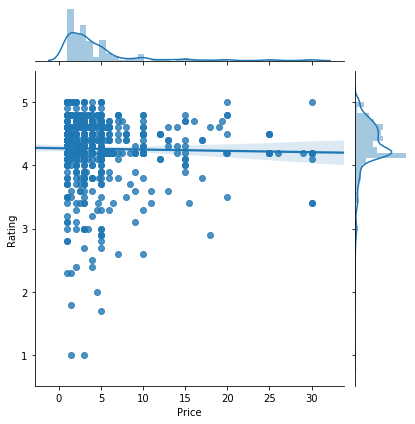

In [111]:
sns.jointplot(data=df1,x='Price' ,y='Rating' ,kind='reg')
plt.show()

In [112]:
df.shape

(8713, 13)

# e.	Does the pattern change?

## Yes there is a change in pattern.The regression line is linear but the linear relationship between variables  became slightly negative 

# f.	What is your overall inference on the effect of price on the rating

## We saw two cases in the relationshop between price and rating :
## When the price is 0 and more than zero on the playstore the ratings are positive
## But when we consider the apps which are not free or which should be buyed by paying ,we observe slightly negative rating.
## Thus we can conclude that the paid apps have slightly negative rating and when we see a relation for both paid and unpaid apps there is a positive rating. 

# 9.	Look at all the numeric interactions together – 

## a.	Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

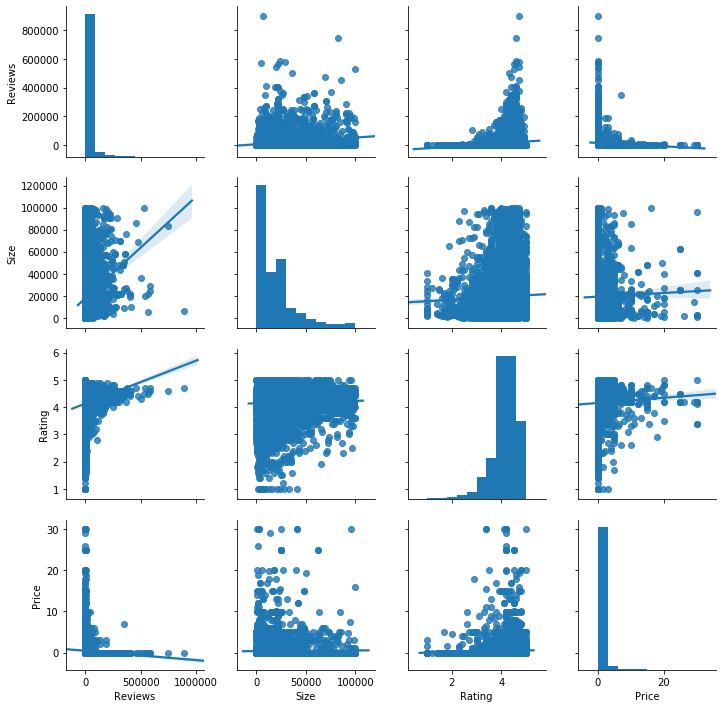

In [113]:
sns.pairplot(df[['Reviews', 'Size', 'Rating', 'Price']],kind='reg')
plt.show()

# 10.	Rating vs. content rating

## a.	Make a bar plot displaying the rating for each content rating

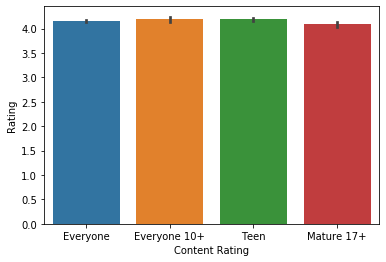

In [114]:
sns.barplot(x='Content Rating',y='Rating',data=df)
plt.show()

## b.	Which metric would you use? Mean? Median? Some other quantile?

## I use mean to make my analysis more understanding.

## c.	Choose the right metric and plot

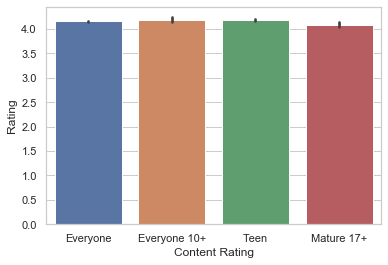

In [115]:
from numpy import mean
sns.set(style= 'whitegrid')
sns.barplot(x= 'Content Rating' ,y= 'Rating', data=df, estimator = mean)
plt.show()

# 11.	Content rating vs. size vs. rating – 3 variables at a time

## a.	Create 5 buckets (20% records in each) based on Size

In [117]:
import warnings
warnings.filterwarnings('ignore')
df['Size_buckets'] = pd.cut(df['Size'],5)
df['Size_buckets']

0         (-91.492, 20006.8]
1         (-91.492, 20006.8]
2         (-91.492, 20006.8]
4         (-91.492, 20006.8]
5         (-91.492, 20006.8]
6         (-91.492, 20006.8]
7         (20006.8, 40005.1]
8         (20006.8, 40005.1]
9         (-91.492, 20006.8]
10        (20006.8, 40005.1]
11        (-91.492, 20006.8]
13        (20006.8, 40005.1]
14        (20006.8, 40005.1]
15        (-91.492, 20006.8]
16        (-91.492, 20006.8]
17        (-91.492, 20006.8]
18        (20006.8, 40005.1]
20        (-91.492, 20006.8]
21        (-91.492, 20006.8]
22        (-91.492, 20006.8]
23        (-91.492, 20006.8]
24        (20006.8, 40005.1]
25        (-91.492, 20006.8]
26        (20006.8, 40005.1]
27        (-91.492, 20006.8]
28        (-91.492, 20006.8]
29        (-91.492, 20006.8]
30        (-91.492, 20006.8]
31        (-91.492, 20006.8]
32        (-91.492, 20006.8]
                ...         
10810     (20006.8, 40005.1]
10811     (-91.492, 20006.8]
10812     (-91.492, 20006.8]
10813     (-91

## b.	By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [118]:
res = pd.pivot_table(df, index=['Rating','Size_buckets'],columns='Content Rating',aggfunc= lambda x : np.percentile(x, 20))
res

Installs                                     \
Content Rating              Everyone Everyone 10+ Mature 17+       Teen   
Rating Size_buckets                                                       
1.0    (-91.492, 20006.8]       90.0          NaN       10.0        NaN   
       (20006.8, 40005.1]       50.0          NaN        NaN        NaN   
       (40005.1, 60003.4]      500.0          NaN        NaN        NaN   
1.2    (20006.8, 40005.1]     1000.0          NaN        NaN        NaN   
1.4    (-91.492, 20006.8]     1000.0          NaN        NaN        NaN   
1.5    (-91.492, 20006.8]      100.0          NaN        NaN        NaN   
       (20006.8, 40005.1]      204.0          NaN        NaN        NaN   
1.6    (-91.492, 20006.8]     1000.0          NaN        NaN        NaN   
       (20006.8, 40005.1]    50000.0          NaN        NaN        NaN   
1.7    (-91.492, 20006.8]     1000.0          NaN        NaN        NaN   
       (20006.8, 40005.1]      180.0          NaN        NaN        NaN   
1.8    (-91.492, 20006.8]     1000.0       1000.0        NaN        NaN   
1.9    (-91.492, 20006.8]     1000.0          NaN   100000.0        NaN   
       (20006.8, 40005.1]    14000.0          NaN        NaN        NaN   
       (60003.4, 80001.7]     1000.0          NaN        NaN        NaN   
2.0    (-91.492, 20006.8]     1000.0          NaN        NaN        NaN   
       (20006.8, 40005.1]       80.0          NaN        NaN     5000.0   
2.1    (-91.492, 20006.8]     2600.0          NaN        NaN        NaN   
       (20006.8, 40005.1]     4200.0          NaN        NaN        NaN   
2.2    (-91.492, 20006.8]      800.0          NaN        NaN        NaN   
       (20006.8, 40005.1]     1000.0      50000.0        NaN        NaN   
2.3    (-91.492, 20006.8]      900.0          NaN        NaN    10000.0   
       (20006.8, 40005.1]        NaN       1000.0        NaN        NaN   
       (40005.1, 60003.4]     1000.0          NaN        NaN        NaN   
       (60003.4, 80001.7]     1000.0          NaN        NaN        NaN   
       (80001.7, 100000.0]   50000.0          NaN        NaN        NaN   
2.4    (-91.492, 20006.8]      700.0          NaN    50000.0    10000.0   
       (20006.8, 40005.1]        NaN          NaN        NaN     5000.0   
       (40005.1, 60003.4]     2800.0          NaN        NaN        NaN   
       (60003.4, 80001.7]    10000.0          NaN        NaN        NaN   
...                              ...          ...        ...        ...   
4.4    (80001.7, 100000.0]  100000.0     600000.0  1000800.0   500000.0   
4.5    (-91.492, 20006.8]     5000.0      10000.0     4300.0     3400.0   
       (20006.8, 40005.1]    10000.0      80000.0    40600.0   100000.0   
       (40005.1, 60003.4]    60000.0     400600.0   604000.0    90000.0   
       (60003.4, 80001.7]   500000.0      20800.0  5000000.0     2800.0   
       (80001.7, 100000.0]   10000.0          NaN  1000000.0   100000.0   
4.6    (-91.492, 20006.8]     1000.0      10000.0     1000.0     1000.0   
       (20006.8, 40005.1]    10000.0      40200.0      100.0   100000.0   
       (40005.1, 60003.4]   100000.0    1000000.0   280000.0   100000.0   
       (60003.4, 80001.7]    80000.0          NaN   100000.0   100000.0   
       (80001.7, 100000.0]  100000.0     640000.0        NaN  1800000.0   
4.7    (-91.492, 20006.8]     1000.0     140000.0      260.0     1000.0   
       (20006.8, 40005.1]    18000.0      64000.0     5000.0     2800.0   
       (40005.1, 60003.4]     1000.0     500000.0    10000.0   100000.0   
       (60003.4, 80001.7]   300400.0    1000000.0        NaN    10000.0   
       (80001.7, 100000.0]    6200.0     100000.0        NaN    50000.0   
4.8    (-91.492, 20006.8]     1000.0       5000.0     1800.0      500.0   
       (20006.8, 40005.1]     1000.0       1000.0      100.0   200008.0   
       (40005.1, 60003.4]      100.0    1000000.0        NaN   100000.0   
       (60003.4, 80001.7]     1000.0     100000.0    

# c.	Make a heatmap of this


## i.	Annotated


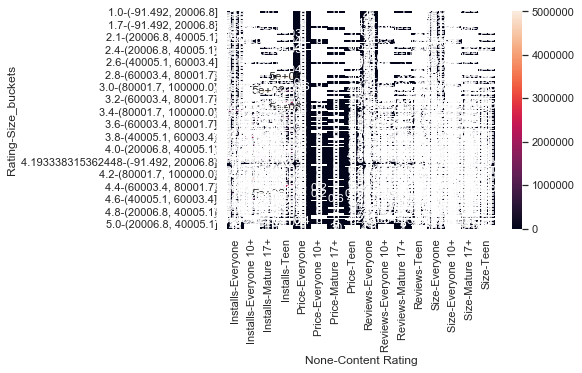

In [121]:
sns.heatmap(res, annot=True)
plt.show()

## ii.	Greens color map

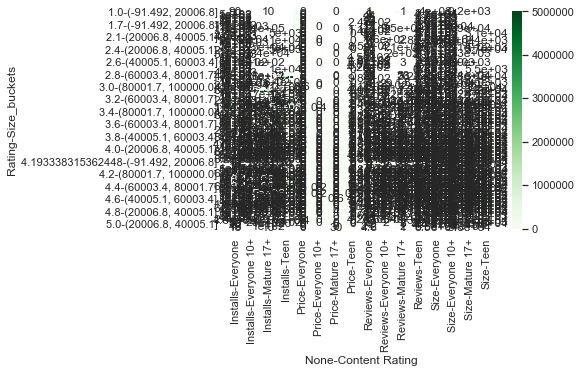

In [120]:
sns.heatmap(res, annot=True,cmap='Greens')
plt.show()

## d.	What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

In [122]:
df['App'].groupby([df['Category'],df['Rating']]).describe()

count unique  \
Category          Rating                  
ART_AND_DESIGN    3.200000     1      1   
                  3.400000     1      1   
                  3.800000     3      3   
                  3.900000     2      2   
                  4.000000     3      3   
                  4.100000     7      7   
                  4.193338     3      3   
                  4.200000     6      6   
                  4.300000     4      4   
                  4.400000     6      6   
                  4.500000     3      3   
                  4.600000     2      2   
                  4.700000    12     12   
                  4.800000     5      5   
                  5.000000     1      1   
AUTO_AND_VEHICLES 2.100000     1      1   
                  2.600000     1      1   
                  3.000000     1      1   
                  3.100000     1      1   
                  3.200000     2      2   
                  3.500000     2      2   
                  3.600000     1      1   
                  3.700000     2      2   
                  3.800000     1      1   
                  3.900000     6      6   
                  4.000000     9      9   
                  4.193338    12     12   
                  4.200000     6      6   
                  4.300000     7      7   
                  4.400000     5      5   
...                          ...    ...   
VIDEO_PLAYERS     3.700000     4      4   
                  3.800000     8      8   
                  3.900000     4      4   
                  4.000000     3      3   
                  4.100000     8      8   
                  4.193338    15     15   
                  4.200000     7      7   
                  4.300000    13     13   
                  4.400000    11     11   
                  4.500000     5      5   
                  4.600000     4      4   
                  4.700000     5      5   
                  4.800000     2      2   
                  4.900000     1      1   
WEATHER           3.300000     1      1   
                  3.500000     2      2   
                  3.600000     1      1   
                  3.700000     3      3   
                  3.800000     5      5   
                  3.900000     3      3   
                  4.000000     3      3   
                  4.100000     1      1   
                  4.193338     7      7   
                  4.200000    12     11   
                  4.300000     4      4   
                  4.400000     6      6   
                  4.500000     9      9   
                  4.600000     3      3   
                  4.700000     3      3   
                  4.800000     3      3   

                                                                          top  \
Category          Rating                                                        
ART_AND_DESIGN    3.200000                    Learn To Draw Kawaii Characters   
                  3.400000                              Ai illustrator viewer   
                  3.800000                   How to draw Ladybug and Cat Noir   
                  3.900000                                Coloring book moana   
                  4.000000  AJ Styles Wallpaper 2018 - AJ Styles HD Wallpaper   
                  4.100000     Photo Editor & Candy Camera & Grid & ScrapBook   
                  4.193338                            Easy DIY CD Craft Ideas   
                  4.200000        Popsicle Sticks and Similar DIY Craft Ideas   
                  4.300000              Pixel Draw - Number Art Coloring Book   
                  4.400000                         Paper flowers instructions   
                  4.500000                          Anime Manga Coloring Book   
                  4.600000                              Mandala Coloring Book   
                  4.700000       Photo Designer - Write your name with shapes   
                  4.800000                            AJ Styles HD Wallpapers   
                  5.0

## All the lighter apps are prefered in all categories
## Even heavier apps are also prefered in all the categories
## Because all the apps having the maximum ratings 
## Very Few have low ratings 